In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book = pd.read_csv("/Users/halders/Documents/Excelr/dataset/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### as we don't have any categorical data we dont have to pre process the data, and null values are also not present


## Apriori Algorithm

In [ ]:
### changing support min. support threshhold values and checkinh results

In [24]:
frequent_items = apriori(book,min_support = 0.04, use_colnames = True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(RefBks, GeogBks, YouthBks, CookBks, ChildBks)"
129,0.0465,"(GeogBks, YouthBks, CookBks, ArtBks, ChildBks)"
130,0.0450,"(RefBks, GeogBks, CookBks, ChildBks, DoItYBks)"
131,0.0535,"(GeogBks, CookBks, ArtBks, ChildBks, DoItYBks)"


In [25]:
frequent_items = apriori(book,min_support = 0.1, use_colnames = True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [49]:
frequent_items = apriori(book, min_support = 0.005, use_colnames = True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
1057,0.0060,"(RefBks, ItalArt, YouthBks, ItalAtlas, CookBks..."
1058,0.0050,"(RefBks, GeogBks, ItalArt, CookBks, ArtBks, It..."
1059,0.0065,"(RefBks, ItalArt, ItalAtlas, CookBks, ArtBks, ..."
1060,0.0080,"(RefBks, GeogBks, ItalArt, ItalAtlas, CookBks,..."


## Creating association rules

In [50]:
rules = association_rules(frequent_items,min_threshold=0.5,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
35297,(ItalAtlas),"(RefBks, GeogBks, ItalArt, CookBks, ArtBks, It...",0.0370,0.0055,0.005,0.135135,24.570025,0.004797,1.149891
35298,(CookBks),"(RefBks, GeogBks, ItalArt, ItalAtlas, ArtBks, ...",0.4310,0.0050,0.005,0.011601,2.320186,0.002845,1.006678
35299,(ArtBks),"(RefBks, GeogBks, ItalArt, ItalAtlas, CookBks,...",0.2410,0.0050,0.005,0.020747,4.149378,0.003795,1.016081
35300,(ItalCook),"(RefBks, GeogBks, ItalArt, ItalAtlas, CookBks,...",0.1135,0.0050,0.005,0.044053,8.810573,0.004432,1.040853


In [52]:
# changing confidence threshhold
## This gives us the rules with threshold greater than 1


rules = association_rules(frequent_items,min_threshold=1,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
35293,(ItalAtlas),"(RefBks, GeogBks, ItalArt, CookBks, ArtBks, It...",0.0370,0.0055,0.005,0.135135,24.570025,0.004797,1.149891
35294,(CookBks),"(RefBks, GeogBks, ItalArt, ItalAtlas, ArtBks, ...",0.4310,0.0050,0.005,0.011601,2.320186,0.002845,1.006678
35295,(ArtBks),"(RefBks, GeogBks, ItalArt, ItalAtlas, CookBks,...",0.2410,0.0050,0.005,0.020747,4.149378,0.003795,1.016081
35296,(ItalCook),"(RefBks, GeogBks, ItalArt, ItalAtlas, CookBks,...",0.1135,0.0050,0.005,0.044053,8.810573,0.004432,1.040853


In [53]:
# sorting rules based on lift.

rules.sort_values('lift', ascending = False)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35255,"(ItalCook, ItalAtlas, ArtBks)","(RefBks, GeogBks, ItalArt, CookBks, DoItYBks)",0.0130,0.0055,0.0050,0.384615,69.930070,0.004928,1.616062
35086,"(RefBks, GeogBks, ItalArt, CookBks, DoItYBks)","(ItalCook, ItalAtlas, ArtBks)",0.0055,0.0130,0.0050,0.909091,69.930070,0.004928,10.857000
35252,"(ItalAtlas, ArtBks, CookBks)","(RefBks, GeogBks, ItalArt, ItalCook, DoItYBks)",0.0140,0.0055,0.0050,0.357143,64.935065,0.004923,1.547000
35089,"(RefBks, GeogBks, ItalArt, ItalCook, DoItYBks)","(ItalAtlas, ArtBks, CookBks)",0.0055,0.0140,0.0050,0.909091,64.935065,0.004923,10.846000
35140,"(ItalArt, RefBks, GeogBks, DoItYBks)","(ItalCook, ItalAtlas, ArtBks, CookBks)",0.0060,0.0130,0.0050,0.833333,64.102564,0.004922,5.922000
...,...,...,...,...,...,...,...,...,...
5347,(Florence),"(YouthBks, RefBks, ChildBks, CookBks)",0.1085,0.0680,0.0075,0.069124,1.016536,0.000122,1.001208
50,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074
51,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920
5143,"(YouthBks, ChildBks, DoItYBks, CookBks)",(Florence),0.0820,0.1085,0.0090,0.109756,1.011577,0.000103,1.001411


In [54]:
import PyARMViz as pyarm
pyarm.generate_rule_graph_plotly(rules)

TypeError: Parameters to generic types must be types. Got <module 'PyARMViz.Rule' from '/opt/anaconda3/lib/python3.7/site-packages/PyARMViz/Rule.py'>.

In [47]:
## To eliminate the reducdancy in rules

def to_list(i):
    return sorted(i)

ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

ma_x = ma_x.apply(sorted)

"""return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]

index_rules = []
for i in unique_rules:
    index_rules.append(return_rules.index(i))
    """


'return_rules = list(ma_x)\nunique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]\n\nindex_rules = []\nfor i in unique_rules:\n    index_rules.append(return_rules.index(i))\n    '

In [48]:
ma_x

941     [ItalArt, ItalAtlas, RefBks]
944     [ItalArt, ItalAtlas, RefBks]
1002    [ArtBks, ItalArt, ItalAtlas]
1003    [ArtBks, ItalArt, ItalAtlas]
991      [ArtBks, ItalArt, ItalCook]
                    ...             
19              [ChildBks, Florence]
64              [DoItYBks, Florence]
65              [DoItYBks, Florence]
50               [CookBks, Florence]
51               [CookBks, Florence]
Length: 1054, dtype: object

In [39]:
##Getting the rules without any reducdancies
rules_without_reducdancies = rules.iloc[index_rules, : ]

In [40]:
rules_without_reducdancies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
398,(GeogBks),"(YouthBks, CookBks)",0.2760,0.1620,0.0970,0.351449,2.169440,0.052288,1.292112
81,(ArtBks),(ItalCook),0.2410,0.1135,0.0565,0.234440,2.065549,0.029147,1.157976
415,(ItalArt),"(YouthBks, CookBks)",0.0485,0.1620,0.0195,0.402062,2.481863,0.011643,1.401483
1050,"(ItalCook, Florence)",(ItalArt),0.0175,0.0485,0.0095,0.542857,11.192931,0.008651,2.081406
60,(ItalAtlas),(DoItYBks),0.0370,0.2820,0.0190,0.513514,1.820970,0.008566,1.475889
...,...,...,...,...,...,...,...,...,...
79,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
648,"(RefBks, CookBks)",(ItalAtlas),0.1525,0.0370,0.0285,0.186885,5.050953,0.022858,1.184335
18,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
310,"(ChildBks, Florence)",(ArtBks),0.0485,0.2410,0.0335,0.690722,2.866065,0.021812,2.454100


In [41]:
rules_without_reducdancies.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
941,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
1002,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
991,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
923,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
1032,"(ItalAtlas, GeogBks)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
...,...,...,...,...,...,...,...,...,...
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
76,(RefBks),(Florence),0.2145,0.1085,0.0310,0.144522,1.332001,0.007727,1.042108
18,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
64,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727


/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0.5, 0, 'lift')

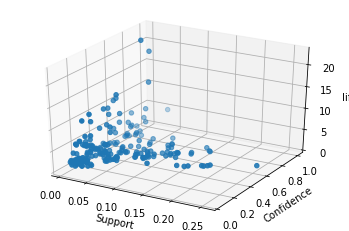

In [42]:
## 3D plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")